# Plotting Reaction Kinetics
**Reading** in data from a file and **plotting** the data is a useful way to quickly **evaluate an experiment**. We will imagine that our data is in a **file** called "E2_DataA.csv" that is located in the same directory as this notebook. In this example, we will examine concentration vs. time data for a reaction and quickly determine if the reaction is **first or second order**. No plotting **paper** for us, we are **digital**!

First we **load** up the **tools**. We will need tools from the Matplotlib.pyplot, NumPy and pandas packages.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

## Read the Data
We will read the file using the tools provided in the **pandas library**. The data file includes column **headers** in its first line. We will use the `read_csv()` function in pandas to create a **dataframe** object from the data file

In [2]:
df = pd.read_csv("E2_DataA.csv", delimiter = ",") # The fields are separated by commas.
print(df)

   time (min)  conc (mM)
0        0.50   2.741794
1        0.75   2.621148
2        1.00   2.505811
3        2.00   2.093029
4        4.00   1.460257
5        6.00   1.018787
6        9.00   0.593696


## Make a Quick Plot
Let us plot the raw data and **check** it for any insanity. As you can see, it looks good. But is it a first order reaction or a second order reaction?

We can address the columns using their **names**. We can plot any two columns as x and y values. 

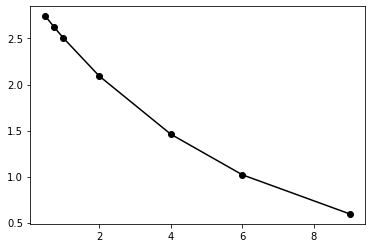

In [3]:
x,y = df["time (min)"], df["conc (mM)"]     # give the names to address the columns for the x and y data.
plt.plot(x,y, "ko-")                        # Make a quick plot.
plt.show()

## A Fancier Plot
We can also capture the list of column names from the `.columns.values` parameter within the **dataframe** object and then use those to address each column of data. This also gives us the **names** to use in the axis of the plot diagram. There are many ways to approach a problem.

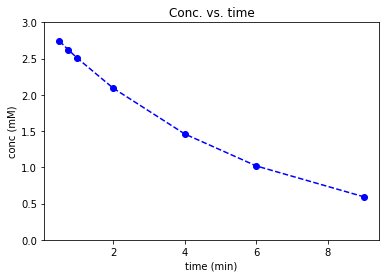

In [4]:
x_col_name, y_col_name = df.columns.values[0:2]  # get column names (two columns starting with position zero)

x, y = df[x_col_name], df[y_col_name]            # use the names to address the columns for the x and y data.

plt.plot(x, y, "bo--")                           # 'b'=blue color, 'o'=circle markers, '--'=dashed line
plt.ylim([0, np.ceil(y.max())])                  # np.ceil() rounds up to the next integer (ceiling function)
plt.xlabel(x_col_name)               
plt.ylabel(y_col_name)
plt.title("Conc. vs. time")          
plt.show()  

## Decisions, Decisions
We know how to plot first and second order reactions as **linear plots**. So let us set that up and plot each case. If the line is linear for one of the plots then we have a match. Let us see if we can make a **decision**.

For a **first order** reaction we have $\ln [A] = \ln [A]_0 - k \cdot t$ and plotting $\ln [A]_t$ vs. $time$ we will have a linear plot. However if the reaction is not first order then the line will curve. As we have seen, the integrated rate equation for **second order** is $\frac{1}{[A]}=\frac{1}{[A]_0} + k \cdot t$. So plotting $\frac{1}{[A]}$ vs. $t$

In [5]:
df["1/conc"] = 1/df[y_col_name]
df["ln conc"] = np.log(df[y_col_name])
display(df)                             # a prettyprint command that makes Jupyter display the object.

,time (min),conc (mM),1/conc,ln conc
0,0.50,2.741794,0.364725,1.008612
1,0.75,2.621148,0.381512,0.963612
2,1.00,2.505811,0.399072,0.918612
3,2.00,2.093029,0.477776,0.738612
4,4.00,1.460257,0.684811,0.378612
5,6.00,1.018787,0.981560,0.018612
6,9.00,0.593696,1.684363,-0.521388


## Now, We Plot
We have all the information we need now.  Let us plot the **two cases** and see if either of them fit the linear equations for $1^{st}$ and $2^{nd}$ order reactions. Which **model** fits the data? Use the code below to plot each case and decide for yourself.

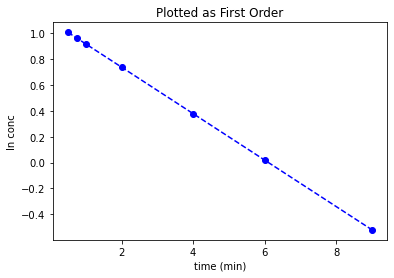

In [6]:
x, y = df[x_col_name], df["ln conc"]

fit = stats.linregress(x,y)       # linear fit of data
m = fit.slope
b = fit.intercept
y_calc = m * x + b                # y-axis calculated from fit parameters

plt.plot(x, y, "bo")              # plot data
plt.plot(x, y_calc, "b--")        # 'b'=blue color, 'o'=circle markers, '--'=dashed line
 
plt.xlabel(x_col_name)               
plt.ylabel("ln conc")
plt.title("Plotted as First Order")          
plt.show()  

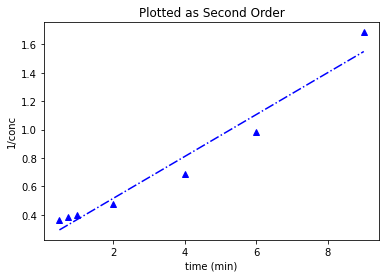

In [7]:
x, y = df[x_col_name], df["1/conc"]        
 
fit = stats.linregress(x,y)       # linear fit of data
m = fit.slope
b = fit.intercept
y_calc = m * x + b                # y-axis calculated from fit parameters

plt.plot(x, y, "b^")              # plot data
plt.plot(x, y_calc, "b-.")        # 'b'=blue color, '^'=triangle markers, '-.'=dot-dashed line

plt.xlabel(x_col_name)               
plt.ylabel("1/conc")
plt.title("Plotted as Second Order")          
plt.show()  

## Summary
We have seen how to **import** data from a data file and use the tools of a pandas **dataframe** to manipulate it. We have seen how to plot this data and also have been introduced to a handful of options for changing the appearance of the plots. There are many ways to change the **style** in plots. See the "Plotting in Python for Fun and Profit" notebook for a few more ideas on making plots fit your style.  

## Resources
The **data file** can be obtained from the resources section of the course **moodle** site. The contents of the file are displayed below so that you can make it yourself if you are unable to access moodle.

**E2_DataA.csv**
```
time (min),conc (mM)
0.5,2.741793556
0.75,2.621147735
1,2.505810634
2,2.093028978
4,1.460256768
6,1.018786577
9,0.593696097
```